In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
%matplotlib inline

In [2]:
def linearplot_with_confidence(x_list, mean_list, std_list, label, marker="", color='r'):
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

In [18]:
def get_final_all_values(algo, budgets, n_seed, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 


    c_list = []
    for seed in range(1, n_seed+1):
        filename = f'benchmark3_rearr_result/benchmark3_rearr_test_algo({algo})_budget({budgets})_seed({seed})_obj(0)_flag({flag})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    result_all_values["c"] = c_list

    return result_all_values 

In [19]:
def plot_values(values, labels=None, title="test"):
    _, ax = p_utils.init_2d_figure(title)
    if labels.size > 1:
        for value, label in zip(values, labels):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)  
    else:
        for label, value in enumerate(values):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)
    # plt.ylim([np.min(values),np.max(values)])

In [20]:
def get_mean_std_values(result_all_values, level=1):
    if level == 1:
        key_name = "level_1_values"
    if level == 2:
        key_name = "level_2_values"
    mean_values = np.mean(result_all_values[key_name], axis=0)
    # mean_values = np.ma.masked_invalid(result_all_values[key_name]).mean(axis=0)
    std_values = np.std(result_all_values[key_name], axis=0)
    return mean_values, std_values

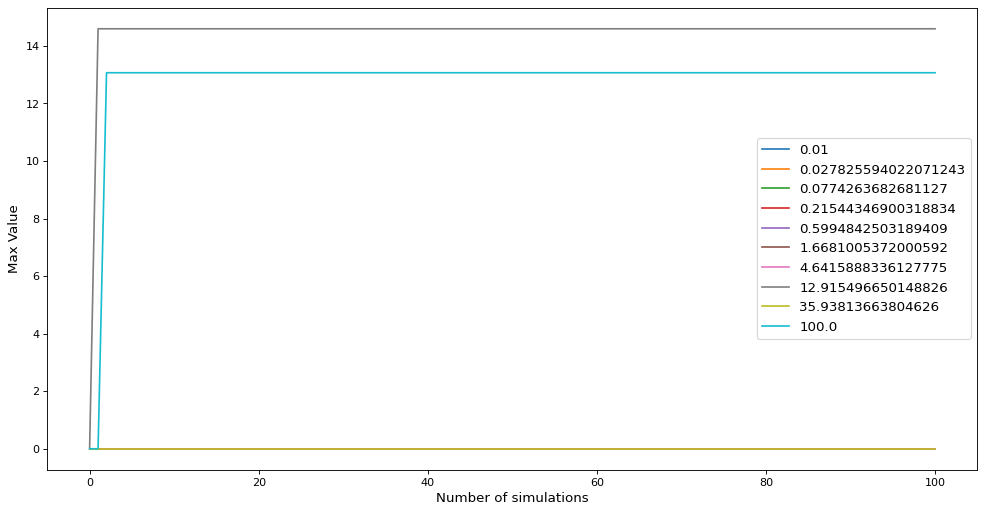

In [23]:
bai_perturb_result_all_values_flag_2 = get_final_all_values("uct", 100, 1 , 2, 0)
perturb_mean_level_1_values_flag_2, perturb_std_level_1_values_flag_2 = get_mean_std_values(bai_perturb_result_all_values_flag_2, level=1)
perturb_mean_level_2_values_flag_2, perturb_std_level_2_values_flag_2 = get_mean_std_values(bai_perturb_result_all_values_flag_2, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_2['c'])
plot_values(perturb_mean_level_2_values_flag_2, labels=bai_perturb_result_all_values_flag_2['c'])

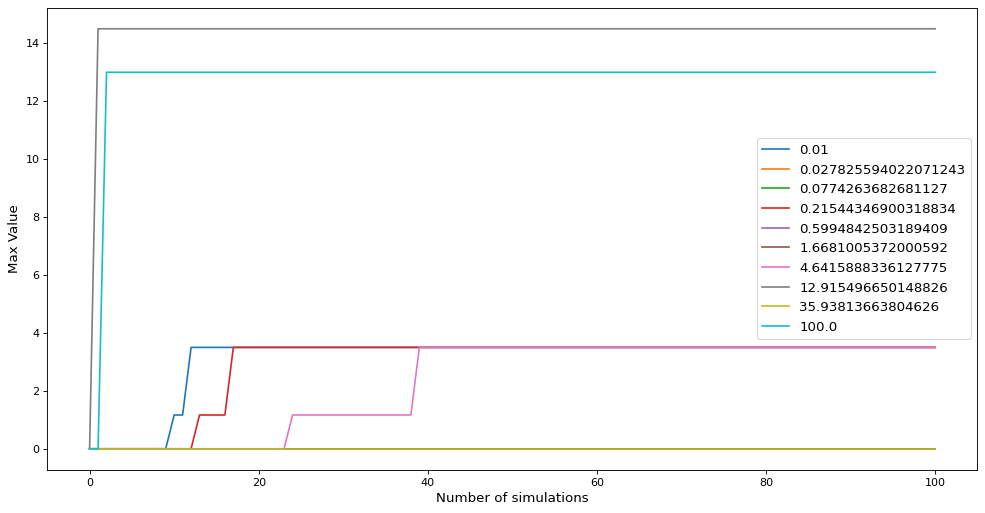

In [24]:
plot_values(perturb_mean_level_1_values_flag_2, labels=bai_perturb_result_all_values_flag_2['c'])

In [ ]:
bai_perturb_result_all_values_flag_1 = get_final_all_values("bai_perturb", 100, 1 , flag = 1, end_num = 0)
perturb_mean_level_1_values_flag_1, perturb_std_level_1_values_flag_1 = get_mean_std_values(bai_perturb_result_all_values_flag_1, level=1)
perturb_mean_level_2_values_flag_1, perturb_std_level_2_values_flag_1 = get_mean_std_values(bai_perturb_result_all_values_flag_1, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_1['c'])
plot_values(perturb_mean_level_2_values_flag_1, labels=bai_perturb_result_all_values_flag_1['c'])

In [ ]:
bai_perturb_result_all_values_flag_0 = get_final_all_values("bai_perturb", 100, 1, 0, 0)
perturb_mean_level_1_values_flag_0, perturb_std_level_1_values_flag_0 = get_mean_std_values(bai_perturb_result_all_values_flag_0, level=1)
perturb_mean_level_2_values_flag_0, perturb_std_level_2_values_flag_0 = get_mean_std_values(bai_perturb_result_all_values_flag_0, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_0['c'])
plot_values(perturb_mean_level_2_values_flag_0, labels=bai_perturb_result_all_values_flag_0['c'])